<a href="https://colab.research.google.com/github/SuryaTeja-aiml/GenAi_2303a52007/blob/main/2303a52007_GenAi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write Python code from scratch to find error metrics of deep learning model.

Actual values and deep learning model predicted values are shown in Table 1.

Also compare the results with the outcomes of libraries

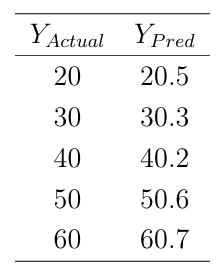

In [23]:
y_actual = [20, 30, 40, 50, 60]
y_pred = [20.5, 30.3, 40.2, 50.6, 60.7]

without library

In [24]:
n = len(y_actual)
mse = sum((y_actual[i] - y_pred[i])**2 for i in range(n)) / n
mae = sum(abs(y_actual[i] - y_pred[i]) for i in range(n)) / n
rmse = mse ** 0.5

In [25]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 0.24600000000000147
MAE: 0.4600000000000016
RMSE: 0.49598387070549127


with library

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse_lib = mean_squared_error(y_actual, y_pred)
mae_lib = mean_absolute_error(y_actual, y_pred)
rmse_lib = math.sqrt(mse_lib)

In [27]:
print(f"MSE: {mse_lib}")
print(f"MAE: {mae_lib}")
print(f"RMSE: {rmse_lib}")

MSE: 0.24600000000000147
MAE: 0.4600000000000016
RMSE: 0.49598387070549127


Write python code from scratch to find evaluation metrics of deep learning model.

 Actual values and deep learning model predicted values are shown in Table 2.

Also compare the results with outcome of libraries

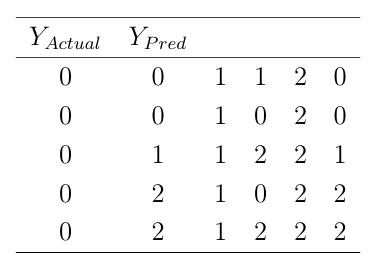

In [28]:
y_actual = [0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2]
y_pred = [0,0,1,1,2,2,0,1,1,1,2,0,2,1,1,2]

without library

In [29]:
def compute_confusion_matrix(y_actual, y_pred, labels):
    n_classes = len(labels)
    cm = [[0] * n_classes for _ in range(n_classes)]  # Confusion matrix initialization
    for true, pred in zip(y_actual, y_pred):
        cm[true][pred] += 1
    return cm
def calculate_metrics_from_cm(cm, labels):
    precision = []
    recall = []
    f1_score = []
    support = []

    for i in range(len(labels)):
        tp = cm[i][i]
        fp = sum(cm[j][i] for j in range(len(labels)) if j != i)
        fn = sum(cm[i][j] for j in range(len(labels)) if j != i)
        tn = sum(sum(cm[k][l] for l in range(len(labels)) if l != i) for k in range(len(labels)) if k != i)

        precision_i = tp / (tp + fp) if tp + fp > 0 else 0
        recall_i = tp / (tp + fn) if tp + fn > 0 else 0
        f1_i = 2 * precision_i * recall_i / (precision_i + recall_i) if precision_i + recall_i > 0 else 0

        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_i)
        support.append(tp + fn)

    return precision, recall, f1_score, support

# Generate confusion matrix
labels = sorted(set(y_actual))
confusion_matrix = compute_confusion_matrix(y_actual, y_pred, labels)

# Calculate metrics
precision, recall, f1_score, support = calculate_metrics_from_cm(confusion_matrix, labels)
accuracy = sum(confusion_matrix[i][i] for i in range(len(labels))) / sum(sum(row) for row in confusion_matrix)

# Print results
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)

Confusion Matrix:
[2, 2, 1]
[1, 3, 2]
[1, 2, 2]


In [30]:
print("\nClassification Report (From Scratch):")
print(f"{'Class':<10}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<8}")
for i, label in enumerate(labels):
    print(f"{label:<10}{precision[i]:<12.2f}{recall[i]:<12.2f}{f1_score[i]:<12.2f}{support[i]:<8}")
print(f"\nOverall Accuracy: {accuracy:.2f}")


Classification Report (From Scratch):
Class     Precision   Recall      F1-Score    Support 
0         0.50        0.40        0.44        5       
1         0.43        0.50        0.46        6       
2         0.40        0.40        0.40        5       

Overall Accuracy: 0.44


In [31]:
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Accuracy: 0.44
Precision: [0.5, 0.42857142857142855, 0.4]
Recall: [0.4, 0.5, 0.4]
F1-Score: [0.4444444444444445, 0.4615384615384615, 0.4000000000000001]


with library

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

print("Confusion Matrix:\n", confusion_matrix(y_actual, y_pred))

# Classification Report (Precision, Recall, F1)
print("Classification Report:\n", classification_report(y_actual, y_pred))

Confusion Matrix:
 [[2 2 1]
 [1 3 2]
 [1 2 2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.43      0.50      0.46         6
           2       0.40      0.40      0.40         5

    accuracy                           0.44        16
   macro avg       0.44      0.43      0.44        16
weighted avg       0.44      0.44      0.44        16



In [33]:
accuracy = accuracy_score(y_actual, y_pred)
precision = precision_score(y_actual, y_pred, average='weighted')
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.4375
Precision: 0.4419642857142857
Recall: 0.4375
F1-Score: 0.43696581196581197
